<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/__Cifar10%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar-10 이미지분류

In [1]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

상수설정

In [2]:
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 100
DATA_AUGMENTATION = True
NUM_PREDICTIONS = 20
MODEL_PATH = 'model/best_cifar-10.h5'

데이터 전처리

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
X_train.shape, X_test.shape
# 컬러, 50000 데이터 테스트는 1만

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
import matplotlib.pyplot as plt

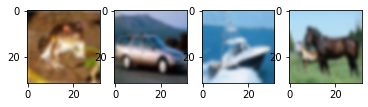

In [6]:
import matplotlib.pyplot as plt

plt.subplot(141)
plt.imshow(X_train[0], interpolation='bicubic')
plt.subplot(142)
plt.imshow(X_train[4], interpolation='bicubic')
plt.subplot(143)
plt.imshow(X_train[8], interpolation='bicubic')
plt.subplot(144)
plt.imshow(X_train[12], interpolation='bicubic');

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_names[y_train[0][0]], class_names[y_train[4][0]], \
    class_names[y_train[8][0]], class_names[y_train[12][0]]

('frog', 'automobile', 'ship', 'horse')

In [8]:
# 정규화(노말라이즈 / 표준화랑 구분)
X_train = X_train/255.0
X_test  = X_test/255.0

In [9]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

## 모델 정의 / 설정 / 학습 / 평가

In [10]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    # 패딩층이 왜이리 많아?

    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [12]:
from tensorflow.keras.optimizers import RMSprop
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(
    optimizer = opt,
    loss= 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
import os
if not os.path.exists('model'):
    os.mkdir('model')
checkpointer = ModelCheckpoint(
    MODEL_PATH, verbose=1, save_best_ony = True
)
early_stopping = EarlyStopping(patience=10)

In [16]:
hist = model.fit(
    X_train, Y_train, validation_split = 0.2,
    epochs=EPOCHS, 
    batch_size = BATCH_SIZE,
    shuffle=True,
    callbacks=[checkpointer, early_stopping]
)

Epoch 1/100
1243/1250 [============================>.] - ETA: 0s - loss: 1.8292 - accuracy: 0.3266
Epoch 00001: saving model to model/best_cifar-10.h5
1250/1250 [==============================] - 20s 8ms/step - loss: 1.8284 - accuracy: 0.3270 - val_loss: 1.5727 - val_accuracy: 0.4274
Epoch 2/100
1247/1250 [============================>.] - ETA: 0s - loss: 1.5187 - accuracy: 0.4437
Epoch 00002: saving model to model/best_cifar-10.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5185 - accuracy: 0.4440 - val_loss: 1.3764 - val_accuracy: 0.5086
Epoch 3/100
1245/1250 [============================>.] - ETA: 0s - loss: 1.3924 - accuracy: 0.4963
Epoch 00003: saving model to model/best_cifar-10.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3922 - accuracy: 0.4967 - val_loss: 1.2712 - val_accuracy: 0.5522
Epoch 4/100
1245/1250 [============================>.] - ETA: 0s - loss: 1.2958 - accuracy: 0.5375
Epoch 00004: saving model to model/best_cifar-10

In [18]:
best_model = load_model(MODEL_PATH)
best_model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6715 - accuracy: 0.7818


[0.6714779734611511, 0.7817999720573425]